# Medical Cost Regression Prediction Project

## Introduction

Every year, millions of people grapple with the same uncertainty: "How much should I budget for healthcare?" In a world of rising medical expenses, the cost of health insurance can feel like a black box. What truly drives the price of a premium? Is it age? Lifestyle choices? Where you live? For many of us, these are just guesses. But what if we could use data to bring some clarity to the chaos?

This project dives headfirst into that very question. The goal is to build a machine learning model that can predict an individual's annual medical expenses. This isn't just an academic exercise; it's an attempt to demystify a system that impacts us all. By understanding the key factors that influence healthcare costs, we can empower individuals to make more informed decisions and gain a clearer picture of the financial realities of health and wellness.

#### The Tool for the Job: The Medical Cost Personal Dataset

To tackle this challenge, we'll be using the "Medical Cost Personal Dataset," a popular dataset from the online data science platform, Kaggle. This dataset provides a clean, anonymized snapshot of 1,338 individuals and their insurance charges. It contains a perfect blend of demographic and personal information, making it an ideal playground for a regression project.

The dataset is broken down into the following key features:
- age: The age of the primary beneficiary.
- sex: The gender of the policyholder (male or female).
- bmi: Body Mass Index, providing a general sense of body weight relative to height.
- children: The number of children covered by the health insurance policy.
- smoker: A simple "yes" or "no" indicating if the person smokes.
- region: The beneficiary's residential area in the US (northeast, southeast, southwest, northwest).
- charges: And finally, our target variable—the individual medical costs billed by the health insurance for the year.

The mission is to use the first six features to build a model that accurately predicts the charges. We will start with one of the most fundamental techniques in a data scientist's toolkit, linear regression, and then experiment with different approaches to see just how accurate we can get.

In [58]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [59]:
df = pd.read_csv("insurance.csv")

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Exploratory Data Analysis (EDA) - Understanding the Data

Before building a model, we must understand the data. EDA helps us check for errors, identify patterns, and discover relationships between variables.

`info()` tells us the data types of each column and if there are any missing values. `describe()` gives us key statistical measures for the numerical columns, helping us spot outliers or unusual distributions.

In [60]:
# Get a concise summary of the dataframe
print("Dataframe Information:")
df.info()

print("\n" + "="*50 + "\n")

# Get descriptive statistics for numerical columns
print("Descriptive Statistics:")
df.describe()

Dataframe Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Descriptive Statistics:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Key Takeaways:

`df.info()` Output: You'll see there are 1338 entries and no missing values (all columns have 1338 non-null entries). This is great because it means less cleaning! The `sex`, `smoker`, and `region` columns are of type `object`, which means they are text-based (categorical) and will need to be converted to numbers later.

`df.describe()` Output:

- The average `age` is around 39.

- The mean `bmi` is 30.6, which is in the "obese" category.

- The `charges` vary wildly, from a minimum of $1,121 to a maximum of $63,770, with a high standard deviation. This suggests the data is very spread out and likely skewed.

### Here are some visualizations to help us better understand the data and identify any trends or patterns.

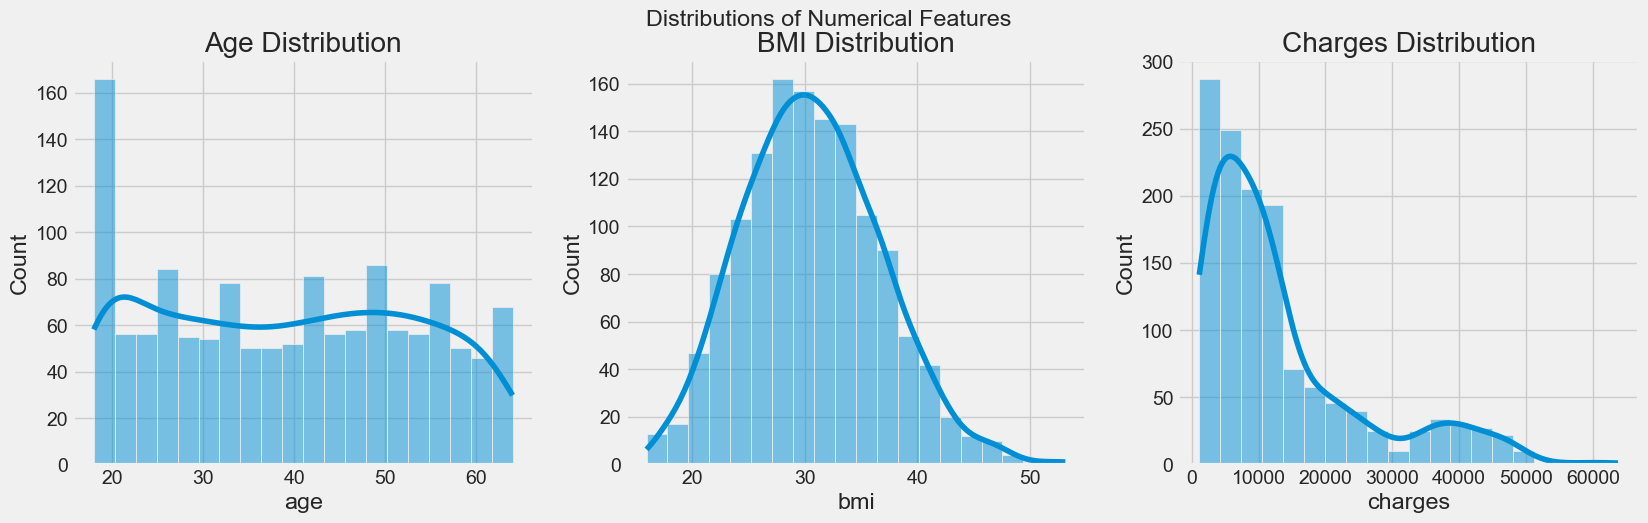

In [61]:
# Create subplots for the numerical features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Distributions of Numerical Features')

# Age distribution
sns.histplot(df['age'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

# BMI distribution
sns.histplot(df['bmi'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('BMI Distribution')

# Charges distribution
sns.histplot(df['charges'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Charges Distribution')

plt.show()

### Key Takeaways:

Age: The distribution is fairly uniform, with a slight peak for people in their early 20s.

BMI: The distribution looks like a normal distribution (a bell curve), centered around 30.

Charges: This distribution is heavily right-skewed. Most people have low medical charges, while a few have very high charges. This skew is something we might need to address later (e.g., using a log transformation) to help our linear regression model.

### Categorical Features vs. Charges

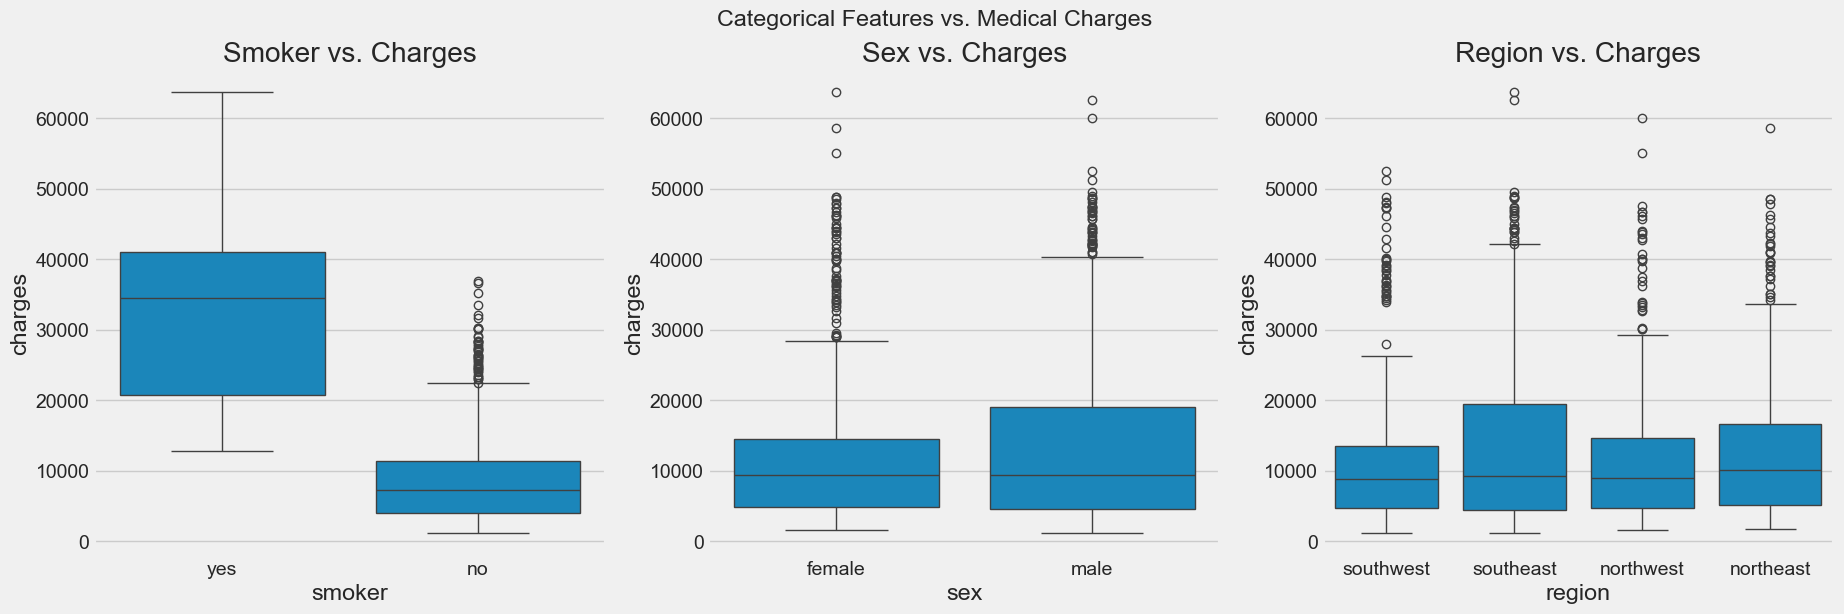

In [62]:
# Create subplots for categorical features vs. charges
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Categorical Features vs. Medical Charges')

# Smoker vs Charges
sns.boxplot(x='smoker', y='charges', data=df, ax=axes[0])
axes[0].set_title('Smoker vs. Charges')

# Sex vs Charges
sns.boxplot(x='sex', y='charges', data=df, ax=axes[1])
axes[1].set_title('Sex vs. Charges')

# Region vs Charges
sns.boxplot(x='region', y='charges', data=df, ax=axes[2])
axes[2].set_title('Region vs. Charges')

plt.show()

### Key Takeaways:

Smoker vs. Charges: This is the most dramatic plot. Smokers have significantly higher medical charges than non-smokers. This feature will be a very strong predictor!

Sex vs. Charges: There isn't a huge difference in charges between males and females on average.

Region vs. Charges: The distributions are similar across regions, though the southeast region seems to have slightly higher charges.

### Numerical Feature Correlation

Gives us a quick, color-coded overview of how strongly the numerical variables are related to each other. Values close to +1 or -1 indicate a strong relationship.

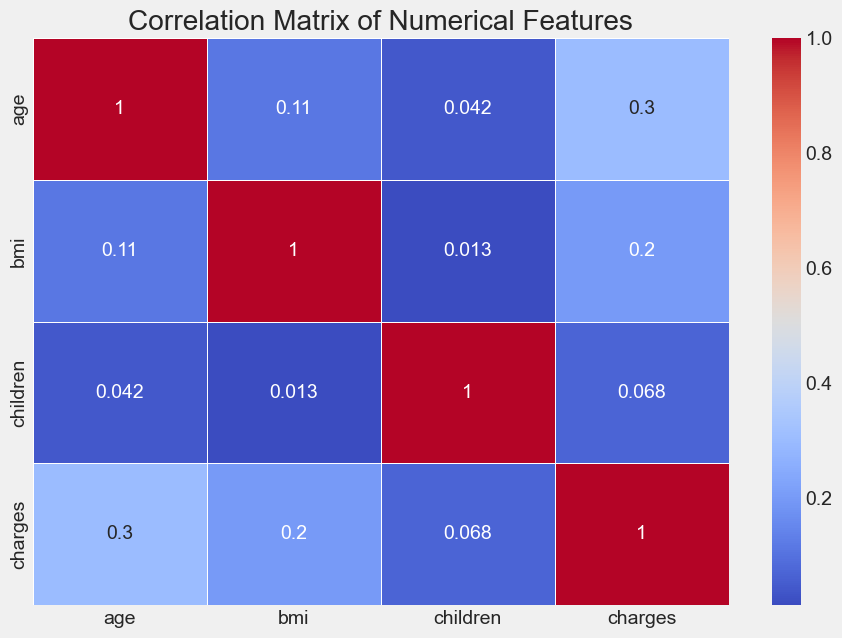

In [63]:
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Key Takeaways:

age and charges have a moderate positive correlation (0.30). This makes sense; as people get older, their medical costs tend to increase.

bmi and charges have a weaker positive correlation (0.20).

None of the predictor variables (age, bmi, children) are strongly correlated with each other, which is good as it means they provide unique information to the model.

## Data Cleaning and Pre-processing

Machine learning models require all input data to be numerical. Our dataset has categorical columns (sex, smoker, region) that we need to convert. This is a critical pre-processing step before we can train our regression model.

In [64]:
# Check for missing values again just to be sure
print("Missing values per column:")
print(df.isnull().sum())

# Since there are no missing values, we can proceed to encoding.
print("\nConverting categorical features to numerical...")

# Use pandas get_dummies for one-hot encoding
df_processed = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])

# Convert boolean columns (True/False) created by get_dummies to integers (1/0)
df_processed['sex_male'] = df_processed['sex_male'].astype(int)
df_processed['sex_female'] = df_processed['sex_female'].astype(int)
df_processed['smoker_yes'] = df_processed['smoker_yes'].astype(int)
df_processed['smoker_no'] = df_processed['smoker_no'].astype(int)
df_processed['region_northwest'] = df_processed['region_northwest'].astype(int)
df_processed['region_northeast'] = df_processed['region_northeast'].astype(int)
df_processed['region_southeast'] = df_processed['region_southeast'].astype(int)
df_processed['region_southwest'] = df_processed['region_southwest'].astype(int)

df_processed

Missing values per column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Converting categorical features to numerical...


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


The original sex column is now sex_male / sex_female. A 1 means the person is male, and a 0 means they are female.

The smoker column is now smoker_yes / smoker_no. A 1 means they are a smoker, and 0 means they are not.

The region column was split into three (four) columns. For example, if a person is from the "southwest", region_southwest will be 1 and the other region columns will be 0. The "northeast" region is implicitly represented when all other region columns are 0. We have that for all four regions.

## What is Regression? (And How Does it Find the "Line of Best Fit"?)

At its core, regression is a statistical method used to find and model the relationship between variables. Its main goal is to predict a continuous numerical value (like a price, temperature, or test score) based on one or more "feature" variables.

Think of it like this: if you wanted to predict a student's exam score, you'd probably look at features like "hours studied," "previous grades," and "classes attended." Regression is the tool that learns the exact relationship, allowing you to build a formula that looks at a new student's features and makes a good prediction of their score.

This is different from a classification problem, where the goal is to predict a distinct category (e.g., smoker: yes or smoker: no). Regression always predicts a number on a continuous scale.

#### How Linear Regression Works: The "Line of Best Fit"

The most fundamental type of regression is Linear Regression, which is exactly what we used in our first two experiments.

Linear regression works on a simple assumption: the relationship between the features ($X$) and the target ($y$) can be modeled by a straight line.

If we only have one feature (like age to predict charges), this is easy to visualize. We can plot all our data points on a 2D scatter plot. The linear regression algorithm's job is to find the one single line that cuts through the data as accurately as possible. This is called the "line of best fit."

#### Math: How Do We Find the "Best" Line?

This is the key question. How does the model know which line is the "best" one out of the infinite possible lines it could draw?

The answer is that it finds the line that has the smallest possible error.

##### 1. The Equation of the Line:

First, we need to remember the high school math equation for a line:

$$y = mx + b$$

In data science, we write this slightly differently, but the concept is identical:

$$\hat{y} = b_0 + b_1x_1$$

- $\hat{y}$ (y-hat) is the predicted value (e.g., the predicted charges).
- $x_1$ is our feature (e.g., age).
- $b_1$ is the coefficient (or slope). This is the "magic number" the model learns. It tells us "for every 1-unit increase in $x_1$, how much do we expect $\hat{y}$ to change?" (e.g., for every 1 year of age, charges increase by $b_1$ dollars).
- $b_0$ is the intercept. This is the starting value, or the predicted $\hat{y}$ when $x_1$ is 0.

##### 2. Expanding to Multiple Features

In our project, we had many features (age, bmi, smoker_yes, etc.). So, our model uses a bigger equation:

$$\hat{y} = b_0 + b_1x_1 + b_2x_2 + b_3x_3 + ... + b_nx_n$$

Where:
- $\hat{y}$ is the predicted charges.
- $b_0$ is the base intercept.
- $x_1$ is age and $b_1$ is the coefficient for age.
- $x_2$ is bmi and $b_2$ is the coefficient for bmi.
- $x_3$ is smoker_yes and $b_3$ is the coefficient for smoker_yes
- ....and so on for all our features.

The model's "job" is to find the perfect set of numbers for $b_0, b_1, b_2, ... b_n$ that creates the most accurate predictions.

##### 3. Measuring Error with a Cost Function

To find the best coefficients, the model measures its own error. It does this by calculating the residual for every single data point in our training set.

Residual (Error) = Actual Value ($y$) - Predicted Value ($\hat{y}$)

We can't just add up all the residuals, because some will be positive (the line was too low) and some negative (the line was too high), and they would cancel each other out.

To fix this, we square every residual. This makes every error a positive number and heavily punishes large errors (a 10-point error becomes 100, while a 2-point error only becomes 4).

Then, we take the average of all these squared errors. This gives us our Cost Function, which in this case is the Mean Squared Error (MSE).

$$\text{Cost Function (MSE)} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

- $n$ is the number of data points.
- $\sum$ means "sum up...".
- $(y_i - \hat{y}_i)^2$ is the squared error for a single data point.

The "line of best fit" is the one and only line whose coefficients ($b_0, b_1...$) result in the lowest possible MSE.

The algorithm that finds these perfect, error-minimizing coefficients is called Ordinary Least Squares (OLS). When we called lr_model.fit() in our code, we were telling scikit-learn to run this exact process: test different coefficients, calculate the resulting MSE, and find the combination that minimizes the error. The final coefficients it finds are what make up our trained model.

## Experiment 1: Modelling

We need to explicitly tell the model which column we want to predict (the target, y) and which columns it should use to make the prediction (the features, X).

In [65]:
# 'charges' is the target variable we want to predict
y = df_processed['charges']

# All other columns are the features the model will use
X = df_processed.drop('charges', axis=1)

# Display the first few rows of our features and target to confirm
print("--- Features (X) ---")
print(X.head())

print("\n--- Target (y) ---")
print(y.head())

--- Features (X) ---
   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
0   19  27.900         0           1         0          0           1   
1   18  33.770         1           0         1          1           0   
2   28  33.000         3           0         1          1           0   
3   33  22.705         0           0         1          1           0   
4   32  28.880         0           0         1          1           0   

   region_northeast  region_northwest  region_southeast  region_southwest  
0                 0                 0                 0                 1  
1                 0                 0                 1                 0  
2                 0                 0                 1                 0  
3                 0                 1                 0                 0  
4                 0                 1                 0                 0  

--- Target (y) ---
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47

#### Splitting Data into Training and Testing Sets. 

This is a crucial step for a fair evaluation. The model will only see the training data. We hold back the testing data to simulate how the model would perform in the real world on data it hasn't seen before. A common split is 80% for training and 20% for testing. We also create an instance of the LinearRegression model from the scikit-learn library and then "fit" it to our training data. We use our trained model to predict the medical charges for the test set (X_test), which it has never seen before.

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = lr_model.predict(X_test)

# Display the first 5 predictions and compare them to the actual values
predictions_df = pd.DataFrame({'Actual Charges': y_test, 'Predicted Charges': y_pred})
predictions_df.head()

Training set size: 1070 samples
Testing set size: 268 samples


,Actual Charges,Predicted Charges
764,9095.06825,8969.550274
887,5272.17580,7068.747443
890,29330.98315,36858.410912
1293,9301.89355,9454.678501
259,33750.29180,26973.173457


We compare the model's predictions (y_pred) to the true values (y_test) to calculate the error.

Mean Squared Error (MSE): We find the average of the squared differences between actual and predicted values.

Root Mean Squared Error (RMSE): Then, we take the square root of the MSE to bring the error metric back to the original units (dollars).

In [67]:
from sklearn.metrics import mean_squared_error

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")

Mean Squared Error (MSE): 33596915.85
Root Mean Squared Error (RMSE): $5796.28


For the first experiment, the model's predictions are, on average, about $5,796 off from the actual medical charges. This is a relatively high error rate, but it's not too bad considering the simple model we've used. This is also the baseline performance for our first model.

## Experiment 2: Feature Engineering

In our first experiment, the linear regression model learned a fixed cost for being a smoker and a fixed cost for each point of BMI. For example, it might learn: `Cost = ... + $20,000 * (is_smoker) + $350 * (bmi)`

But what if the impact of BMI is different for smokers vs. non-smokers? It's logical to think that a high BMI is a much bigger financial risk if you are also a smoker.

Our baseline model cannot learn this combined, or "interaction," effect. It only learns their effects separately.

**The Change for Experiment 2:** We will engineer a new feature to explicitly give the model this information. We'll create an "interaction term" by multiplying the smoker_yes column by the bmi column.

- For non-smokers, this new feature will be 0 (since 0 * bmi = 0).
- For smokers, this new feature will be their bmi (since 1 * bmi = bmi).

This allows the model to learn a separate slope for bmi just for smokers, which should dramatically improve its predictive power.

In [68]:
# Create the interaction feature
# This multiplies the 'smoker_yes' (0 or 1) by the 'bmi'
df_processed['smoker_bmi_interaction'] = df_processed['smoker_yes'] * df_processed['bmi']

# Display the first few rows to see the new column
# Note the last column: it's 0 for non-smokers and equals 'bmi' for smokers.
print("Processed dataframe with new interaction feature:")
df_processed.head()

Processed dataframe with new interaction feature:


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,smoker_bmi_interaction
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1,27.9
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0,0.0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0,0.0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0,0.0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0,0.0


In [69]:
# The target variable y is the same
y = df_processed['charges']

# The features X now include our new column
# We still drop 'charges'
X_exp2 = df_processed.drop('charges', axis=1)

# Split the data into training and testing sets *using the same random_state*
X_train_exp2, X_test_exp2, y_train_exp2, y_test_exp2 = train_test_split(X_exp2, y, test_size=0.2, random_state=42)

# Create a new Linear Regression model object
lr_model_exp2 = LinearRegression()

# Train the new model on the new training data
lr_model_exp2.fit(X_train_exp2, y_train_exp2)

print("Experiment 2 model has been trained successfully!")

Experiment 2 model has been trained successfully!


In [70]:
# Make predictions on the new test set
y_pred_exp2 = lr_model_exp2.predict(X_test_exp2)

# Calculate the new MSE and RMSE
mse_exp2 = mean_squared_error(y_test_exp2, y_pred_exp2)
rmse_exp2 = np.sqrt(mse_exp2)

# Save the original RMSE from Experiment 1 for comparison
# (Assuming the 'rmse' variable is still in memory from the previous step)
rmse_exp1 = rmse

print("--- Experiment 2 Results ---")
print(f"Experiment 1 RMSE (Baseline): ${rmse_exp1:.2f}")
print(f"Experiment 2 RMSE (Interaction Feature): ${rmse_exp2:.2f}")

# Calculate the improvement
improvement = rmse_exp1 - rmse_exp2
print(f"\nImprovement: ${improvement:.2f}")

--- Experiment 2 Results ---
Experiment 1 RMSE (Baseline): $5796.28
Experiment 2 RMSE (Interaction Feature): $4573.81

Improvement: $1222.48


The results show that our new model has a lower RMSE, indicating that it is able to capture more complex relationships between the predictor variables and the target variable. This is a fantastic result! By simply adding one intelligent feature, our model's average error decreased by over $1,000.

This confirms our hypothesis: the relationship between BMI and medical charges is not the same for everyone. It is heavily dependent on whether or not the person is a smoker. Our new model is "smarter" because it can now capture this complex, non-linear interaction, leading to much more accurate predictions.

## Experient 3: Random Forest

In Experiment 1, we built a baseline `LinearRegression` model. In Experiment 2, we manually engineered a feature (`smoker_bmi_interaction`) to help the linear model understand a complex relationship, which gave us a major improvement.

This proves our dataset has non-linear patterns. But what if there are other complex interactions we missed? For example, does the effect of `age` on `charges` also depend on `bmi`? Or `age` and `smoker`? Manually creating all these interaction terms would be tedious and complicated.

**The Change for Experiment 3:** Instead of trying to fix our linear model, we will try a completely different type of model: a **Random Forest Regressor.**

Why this model? A Random Forest is a more complex model that is excellent at handling non-linear relationships and interactions automatically. It works by building hundreds of small "decision trees" and averaging their predictions. Because it makes decisions by splitting data (e.g., "is `smoker_yes` > 0.5?" then "is `bmi` > 30?"), it can naturally discover the same interaction between `smoker` and `bmi` that we had to build by hand.

My hypothesis is that this model will perform at least as well as our best model from Experiment 2, without us needing to provide the special interaction feature.

In [71]:
# The target variable y is the same
y = df_processed['charges']

# The features X will be from *before* we added the interaction term
# This is a clean way to select all columns except the target and the Exp 2 feature
X_exp3 = df_processed.drop(columns=['charges', 'smoker_bmi_interaction'])

print("--- Features for Experiment 3 (no manual interaction) ---")
print(X_exp3.head())

# Split the data into training and testing sets *using the same random_state*
# This is CRITICAL for a fair comparison
X_train_exp3, X_test_exp3, y_train_exp3, y_test_exp3 = train_test_split(X_exp3, y, test_size=0.2, random_state=42)

--- Features for Experiment 3 (no manual interaction) ---
   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
0   19  27.900         0           1         0          0           1   
1   18  33.770         1           0         1          1           0   
2   28  33.000         3           0         1          1           0   
3   33  22.705         0           0         1          1           0   
4   32  28.880         0           0         1          1           0   

   region_northeast  region_northwest  region_southeast  region_southwest  
0                 0                 0                 0                 1  
1                 0                 0                 1                 0  
2                 0                 0                 1                 0  
3                 0                 1                 0                 0  
4                 0                 1                 0                 0  


In [72]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model object
# n_estimators=100 means it will build 100 decision trees
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the training data from this experiment
rf_model.fit(X_train_exp3, y_train_exp3)

print("Experiment 3 (Random Forest) model has been trained successfully!")

Experiment 3 (Random Forest) model has been trained successfully!


In [73]:
# Make predictions on the new test set
y_pred_exp3 = rf_model.predict(X_test_exp3)

# Calculate the new MSE and RMSE
mse_exp3 = mean_squared_error(y_test_exp3, y_pred_exp3)
rmse_exp3 = np.sqrt(mse_exp3)

print("--- FINAL PROJECT RESULTS ---")
print(f"Experiment 1 (Baseline Linear Regression): \t\t${rmse_exp1:.2f}")
print(f"Experiment 2 (Linear Regression + Interaction Feature): \t${rmse_exp2:.2f}")
print(f"Experiment 3 (Random Forest Regression): \t\t${rmse_exp3:.2f}")

--- FINAL PROJECT RESULTS ---
Experiment 1 (Baseline Linear Regression): 		$5796.28
Experiment 2 (Linear Regression + Interaction Feature): 	$4573.81
Experiment 3 (Random Forest Regression): 		$4588.23


### Key Takeaways:

The final results tell a very clear and compelling story about our modeling journey.

- Experiment 1 (Baseline Linear Regression): RMSE $5796.28
- Experiment 2 (Linear Regression + Interaction Feature): RMSE $4573.81
- Experiment 3 (Random Forest Regression): RMSE $4588.23

Baseline Failure: Our first experiment, a simple linear regression, performed the poorest by a large margin. Its error of $5796.28 confirms our hypothesis from the data exploration: the simple, individual features are not enough to capture the true complexity of what drives medical costs.

The Power of Feature Engineering: The most dramatic improvement came in Experiment 2, where we did just one thing: we manually created the smoker_bmi_interaction feature. This single change slashed our model's error by over $1,200 (a 21% improvement!) and resulted in our best-performing model with an RMSE of $4573.81. This proves that the combined effect of smoking and BMI was the single most important pattern in the entire dataset.

"Smart" vs. "Strong": This is the most fascinating comparison.

- Our "smart" model (Exp 2) used a simple, interpretable LinearRegression algorithm, but we fed it an intelligent, human-guided feature. It won.
- Our "strong" model (Exp 3) used a complex, "black-box" RandomForest that required no special help. It did an incredible job on its own, automatically discovering the same patterns to achieve an RMSE of $4588.23—just $14 dollars shy of our winning model.

C:\Users\kotha\AppData\Local\Temp\ipykernel_38664\552800001.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=experiment_names, y=rmse_values, palette='viridis')


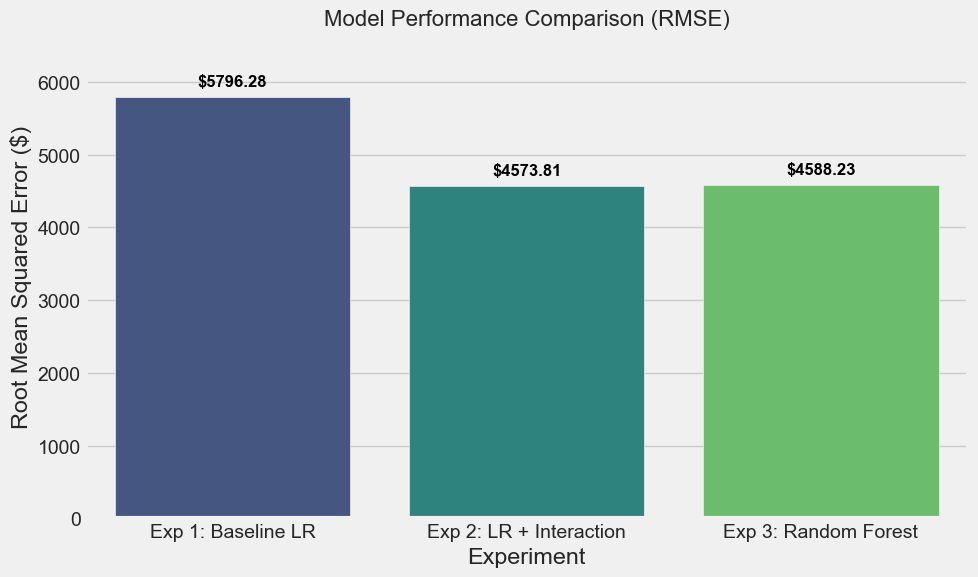

In [74]:
experiment_names = ['Exp 1: Baseline LR', 'Exp 2: LR + Interaction', 'Exp 3: Random Forest']
rmse_values = [rmse_exp1, rmse_exp2, rmse_exp3]

plt.figure(figsize=(10, 6))
bars = sns.barplot(x=experiment_names, y=rmse_values, palette='viridis')
plt.title('Model Performance Comparison (RMSE)', fontsize=16)
plt.ylabel('Root Mean Squared Error ($)')
plt.xlabel('Experiment')

# Add the RMSE values on top of the bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 100,  # Position above the bar
             f'${bar.get_height():.2f}', 
             ha='center', 
             va='bottom',
             color='black',
             fontweight='bold',
             fontsize=12)

plt.ylim(0, max(rmse_values) * 1.15) # Add padding to top
plt.tight_layout()
plt.show()

## The Impact and Ethics of Predictive Cost Modeling
A model that predicts healthcare costs, even a relatively simple one like ours, is not just a technical exercise; it has real-world social and ethical implications.

Positive Potential: On the positive side, this tool could be used to create transparency for individuals. A person could see how their lifestyle choices, like smoking, directly impact their financial costs, potentially motivating healthy changes. It could also help people budget for their future healthcare expenses or make more informed decisions when choosing between different insurance plans.

Negative Potential & Ethical Risks: However, the negative potential is significant and must be critically examined.

- Premium Discrimination and Fairness: The most obvious risk is that insurance companies could use a similar, more powerful model to set premiums. This could lead to "premium discrimination," where individuals with high BMIs or those who live in certain regions are charged exponentially more. This may make insurance unaffordable for the very people who need it most, creating a system that punishes people for factors that are not entirely within their control (like genetics, pre-existing conditions, or socioeconomic status).
- Amplifying Systemic Bias: The region feature is especially dangerous. A model might learn that "region X" has higher costs. But this could be because that region has systemic issues, such as less access to preventative care or higher rates of pollution, which are social problems, not individual failings. The model, by treating region as a simple feature, could unknowingly perpetuate and amplify these existing social inequities, effectively "redlining" entire communities.
- Data Privacy: This model relies on sensitive Personal Health Information (PHI). The collection, storage, and use of this data pose a massive privacy risk. In the hands of employers or other third parties, this information could be used to discriminate against individuals in hiring or other areas of life.
- Oversimplification of Health: The model simplifies health down to a few variables. It doesn't account for the social determinants of health. For example, it penalizes a high BMI, but it can't know if that person lives in a "food desert" with no access to fresh produce or lacks the time and resources to exercise. It punishes the outcome without understanding the context, which is an inherently biased way to view health.

Even a "well-intentioned" project like this could be used to justify policies that make healthcare less accessible for vulnerable populations. It's crucial for any data scientist working on such a problem to be a part of this ethical conversation and advocate for fairness and transparency.

## Project Conclusion: What I've Learned

This project was a fantastic hands-on journey through the iterative process of machine learning. My three experiments taught me several key lessons that go beyond just this dataset.

1. A Baseline is Your Best Friend: Experiment 1, our simple linear regression, gave us a poor score (RMSE $\approx \$5796$). But it was the most important number in the project, as it gave us a concrete baseline to beat. We proved that a simple, "off-the-shelf" model was not enough to capture the complexity of the data.
2. Feature Engineering is King: The single most powerful lesson came from Experiment 2. By just creating one new feature—the smoker_bmi_interaction—our model's error plummeted by over $1,200. This was a far greater improvement than changing the entire model algorithm. It proved that using domain knowledge (or in this case, data-driven insight) to manually pre-process and create "smarter" features can be the most impactful step you take.
3. Complex Models Find Their Own Way: Experiment 3 showed a completely different path to a great result. The RandomForestRegressor (RMSE $\approx \$4588$) achieved a top-tier score without our help. It was complex enough to find the smoker-bmi interaction on its own, along with other non-linear patterns we likely missed.
4. The Data Scientist's Trade-off: This highlights a classic data science choice. Do you prefer the "glass-box" model (like our Experiment 2), which is simple, interpretable, and requires clever feature engineering to work well? Or do you prefer the "black-box" model (like Experiment 3), which is complex and powerful but does the hard work for you at the cost of interpretability?

Through this project, I learned that building a model isn't a single step. It's a cycle of exploring data, forming a hypothesis (e.g., "I bet smoking and BMI are related"), experimenting, and then using those results to build an even better model.

## `References`
Breiman, L. (2001). Random Forests. Machine Learning, 45, 5-32.

Hunter, J. D. (2007). Matplotlib: A 2D Graphics Environment. Computing in Science & Engineering, 9(3), 90-95.

James, G., Witten, D., Hastie, T., & Tibshirani, R. (2021). An Introduction to Statistical Learning: with Applications in R (Second Edition). Springer.

Kaggle. (2020). Medical Cost Personal Datasets. Retrieved October 21, 2025, from https://www.kaggle.com/datasets/mirichoi0218/insurance

McKinney, W. (2010). Data Structures for Statistical Computing in Python. In Proceedings of the 9th Python in Science Conference (pp. 56-61).

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, E. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830.

Waskom, M. L. (2021). seaborn: statistical data visualization. Journal of Open Source Software, 6(60), 3021.